## Assignment 5: Linear Regression

### Stefenie Pickston
#### 1506427

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-value/housing.csv


### Part 1: Regression

1.) Loading the data and data preprocessing

In [2]:
# Load Data
df = pd.read_csv(os.path.join(dirname, filename))

# Check...
print('Loaded...')

# Replace all NULL/missing values
df = df.fillna(0)

df.info()
df.head()

# define x and y before preprocessing to not get errors with columns
x = df.iloc[:, 1:9]
y = df.iloc[:, 9]

# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Turn categorical variables into numeric variables. 
le = preprocessing.LabelEncoder()
x['ocean_proximity'] = le.fit_transform(x['ocean_proximity'])

# Split into four categories, one hot encoding
x['ocean_proximity_1']=(x['ocean_proximity']==1).astype(int)
x['ocean_proximity_2']=(x['ocean_proximity']==2).astype(int)
x['ocean_proximity_3']=(x['ocean_proximity']==3).astype(int)
x['ocean_proximity_4']=(x['ocean_proximity']==4).astype(int)

# delete original column
x = x.drop('ocean_proximity',axis=1)

# save columns
columns = x.columns

# Scaling the data for SGD
scaler = StandardScaler()
x = scaler.fit_transform(x)

# convert array back into dataframe
x = pd.DataFrame(x, columns = columns)

x.head(10)

Loaded...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_1,ocean_proximity_2,ocean_proximity_3,ocean_proximity_4
0,1.052548,0.982143,-0.804819,-0.954593,-0.974429,-0.977033,2.344766,-0.681889,-0.015566,2.830742,-0.384466
1,1.043185,-0.607019,2.045890,1.356913,0.861439,1.669961,2.332238,-0.681889,-0.015566,2.830742,-0.384466
2,1.038503,1.856182,-0.535746,-0.810272,-0.820777,-0.843637,1.782699,-0.681889,-0.015566,2.830742,-0.384466
3,1.038503,1.856182,-0.624215,-0.703806,-0.766028,-0.733781,0.932968,-0.681889,-0.015566,2.830742,-0.384466
4,1.038503,1.856182,-0.462404,-0.597339,-0.759847,-0.629157,-0.012881,-0.681889,-0.015566,2.830742,-0.384466
5,1.038503,1.856182,-0.786942,-0.755856,-0.894071,-0.801787,0.087447,-0.681889,-0.015566,2.830742,-0.384466
6,1.033821,1.856182,-0.046188,-0.102861,-0.292712,0.037823,-0.111366,-0.681889,-0.015566,2.830742,-0.384466
7,1.033821,1.856182,0.214634,0.365591,-0.237079,0.385698,-0.395137,-0.681889,-0.015566,2.830742,-0.384466
8,1.033821,1.061601,-0.037021,0.313541,-0.193810,0.249687,-0.942359,-0.681889,-0.015566,2.830742,-0.384466
9,1.033821,1.856182,0.418616,0.412910,0.110844,0.560944,-0.094470,-0.681889,-0.015566,2.830742,-0.384466


3.) Splitting the data. 80/20

In [3]:
# Importing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1506427)

# Check
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(16512, 11) (4128, 11) (16512,) (4128,)


4.) Define a function to compute the median house value. 

In [4]:
# import mae libraries
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def run_reg(regressor, x_train, x_test, y_train, y_test, name):
    # train the regressor using the train data
    reg = regressor.fit(x_train, y_train)
    # compute predictions for the test data
    predicted = reg.predict(x_test)
    # set all predictions that are smaller than 15000, to 15000
    for i, d in enumerate(predicted):
        if d < 15000:
            predicted[i] = 15000
    # set all predictions that are larger than 500000, to 500000
    for i, d in enumerate(predicted):
        if d > 500000:
            predicted[i] = 500000
    #print(min(predicted))
    # compute the MAE (mean_absolute_error) for the test data
    mae = mean_absolute_error(y_test, predicted)
    # scatterplot the true test targets vs. predictions (show MAE in the plot as "title")
    plt.title(f'{name} MAE = {mae}')
    plt.scatter(y_test, predicted)
    plt.show()
    # plot the coeffients of the model [challenge: have the names of the features as the labels to the coefficients] 
    coef = reg.coef_
    plt.title(f'{name} Coefficients')
    plt.bar(x_train.columns, coef, color ='maroon',width = 0.1)
    plt.xticks(rotation = 90)
    plt.show()
    # return the MAE
    return mae

5.) Use the function to calculate median house value using...

    a.) LinearRegression
    
    b.) SGDRegression

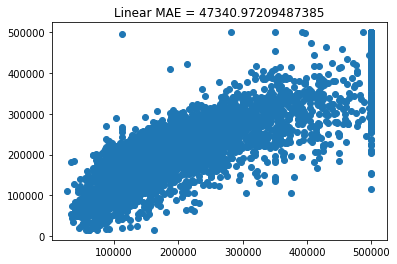

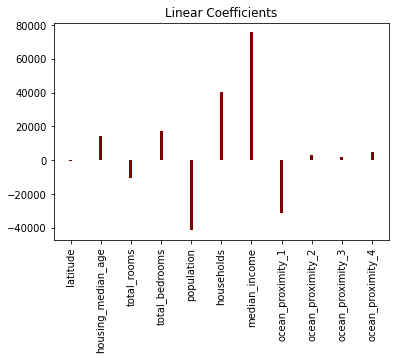

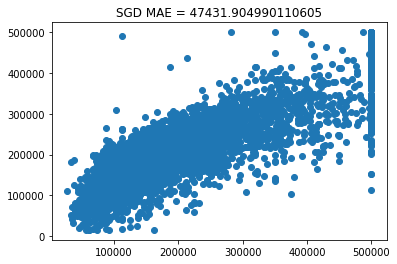

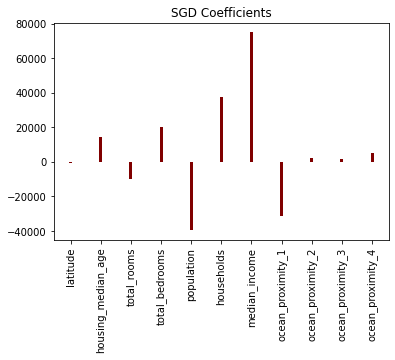

In [5]:
# Using linear regression....
from sklearn.linear_model import LinearRegression
med_house_val_LIN = run_reg(LinearRegression(), x_train, x_test, y_train, y_test, "Linear")

# Using SGDRegression...
from sklearn.linear_model import SGDRegressor
med_house_val_SGD = run_reg(SGDRegressor(learning_rate = 'constant', eta0 = 0.0001), x_train, x_test, y_train, y_test, "SGD")

### Part 2: Training Curves

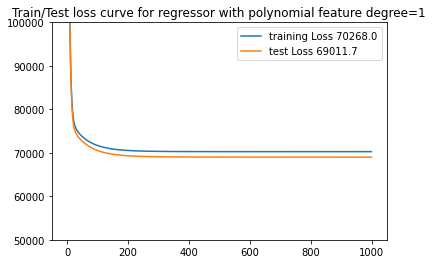

In [6]:
# Provided code...
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

from sklearn.linear_model import SGDRegressor
def run_training_curve(degree=1,learning_rate=0.00001,scaled=True,plot_scale=True):
    df=pd.read_csv('../input/california-housing-value/housing.csv')
    df=df.fillna(0)
    X=df.iloc[:,0:-1]
    y=df.iloc[:,-1]
    le=LabelEncoder()
    X['ocean_proximity']=le.fit_transform(X['ocean_proximity'])
    scaler=StandardScaler()
    poly = PolynomialFeatures(degree)
    X_poly=poly.fit_transform(X)
    if scaled==True:
        X_poly=scaler.fit_transform(X_poly)
    X_train, X_test, y_train, y_test = train_test_split(X_poly,y,test_size=0.4, random_state=1234567)
    sgd=SGDRegressor(random_state=1234567,verbose=0,learning_rate='constant',eta0=learning_rate)
    train_loss_list=[]
    test_loss_list=[]
    for epoch in range(1000):
        sgd.partial_fit(X_train,y_train)
        y_pred_train=sgd.predict(X_train)
        y_pred_test=sgd.predict(X_test)
        train_loss_list.append(np.sqrt(np.mean((y_pred_train-y_train)**2)))
        test_loss_list.append(np.sqrt(np.mean((y_pred_test-y_test)**2)))
    plt.plot(train_loss_list,label=f'training Loss {np.min(train_loss_list[500:]):.6}')
    plt.plot(test_loss_list,label=f'test Loss {np.min(test_loss_list[500:]):.6}')
    plt.legend()
    if plot_scale==True:
        plt.ylim([50000,100000])
    plt.title(f"Train/Test loss curve for regressor with polynomial feature degree={degree}")
    plt.show()
    
run_training_curve()

2.) Run provided code below. Comment about the training curves you see, for which polynomial degree do you think that the regressor is underfitted/overfitted. Bring up any other observations and thoughts you may have.

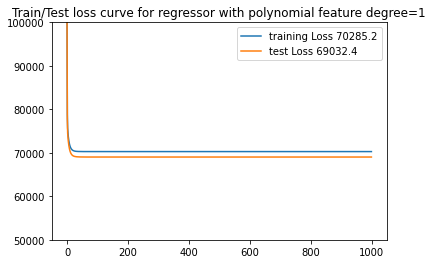

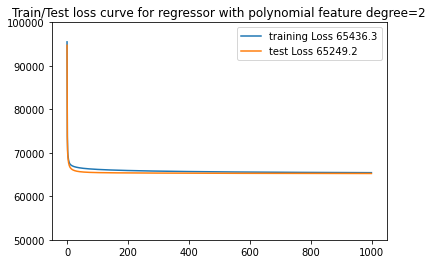

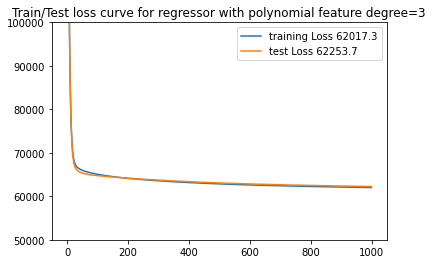

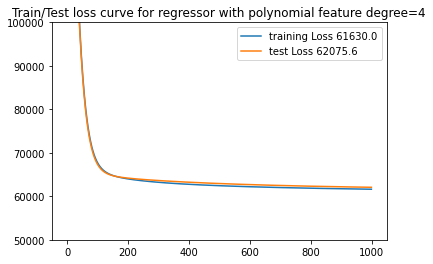

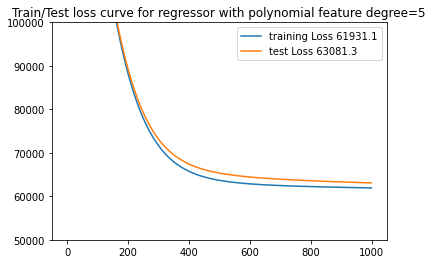

In [7]:
# More provided code...
learning_schedule=[0.0001,0.0001,0.0001,0.00001,0.000002,0.0000005] 
for degree in range(1,6):
    lr=learning_schedule[degree]
    run_training_curve(degree=degree,learning_rate=lr)

We can see that as the polynomial feature degree increases, the training loss and test loss get closer and closer to each other. This is, of course, until we get to polynomial feature degree of 5.

The training and test loss decreases with the increase of the polynomial feature degree for 1-4, where 1 and 2 are underfitted, while 3 and 4 get more ideal results. For polynomial feature degree of 5, the data is overfitted as there is a larger difference between the test loss and training loss. One may also note that the loss is also increased from the polynomial degree feature of 4.

We would expect that as the polynomial feature degree increases, the training loss and test loss would become less and less because we are fitting more and more features (however, we must be aware that this can lead to overfitting). 

3.) Run provided code below. Comment and discuss the training curves

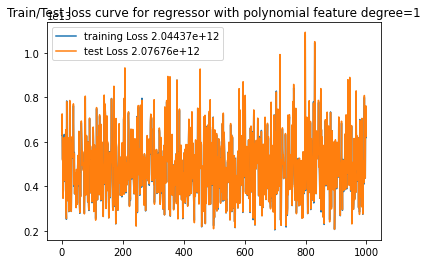

In [8]:
run_training_curve(degree=1,learning_rate=1, plot_scale=False)

In this graph we can see the values are bouncing around. This is because the SGD regressor is not converging due to the learning rate being too large.

4.) Run provided code below. Comment and discuss the training curves.

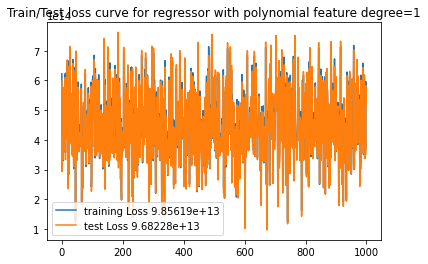

In [9]:
run_training_curve(degree=1,learning_rate=0.0001, scaled=False, plot_scale=False)

Once again, we can see that training loss and test loss seem to be close together with a similar scatter of data. This time it is because the data not scaled. A possible way to fix this would be to reduce learning rate but since this plot already has a much smaller learning rate, so decreasing it would take the process forever to complete. It would be much easier just to scale the data.

Therefore one should always scale their data when using SGDRegression or SGDClassifier otherwise you might get funky results.